# Machine Learning Engineer Nanodegree
## Introduction and Foundations
## Project 0: Titanic Survival Exploration

In 1912, the ship RMS Titanic struck an iceberg on its maiden voyage and sank, resulting in the deaths of most of its passengers and crew. In this introductory project, we will explore a subset of the RMS Titanic passenger manifest to determine which features best predict whether someone survived or did not survive. To complete this project, you will need to implement several conditional predictions and answer the questions below. Your project submission will be evaluated based on the completion of the code and your responses to the questions.
> **Tip:** Quoted sections like this will provide helpful instructions on how to navigate and use an iPython notebook. 

# Getting Started
To begin working with the RMS Titanic passenger data, we'll first need to `import` the functionality we need, and load our data into a `pandas` DataFrame.  
Run the code cell below to load our data and display the first few entries (passengers) for examination using the `.head()` function.
> **Tip:** You can run a code cell by clicking on the cell and using the keyboard shortcut **Shift + Enter** or **Shift + Return**. Alternatively, a code cell can be executed using the **Play** button in the hotbar after selecting it. Markdown cells (text cells like this one) can be edited by double-clicking, and saved using these same shortcuts. [Markdown](http://daringfireball.net/projects/markdown/syntax) allows you to write easy-to-read plain text that can be converted to HTML.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv as csv

def filter_data(data, condition):
    """
    Remove elements that do not match the condition provided.
    Takes a data list as input and returns a filtered list.
    Conditions should be a list of strings of the following format:
      '<field> <op> <value>'
    where the following operations are valid: >, <, >=, <=, ==, !=
    
    Example: ["Sex == 'male'", 'Age < 18']
    """

    field, op, value = condition.split(" ")
    
    # convert value into number or strip excess quotes if string
    try:
        value = float(value)
    except:
        value = value.strip("\'\"")
    
    # get booleans for filtering
    if op == ">":
        matches = data[field] > value
    elif op == "<":
        matches = data[field] < value
    elif op == ">=":
        matches = data[field] >= value
    elif op == "<=":
        matches = data[field] <= value
    elif op == "==":
        matches = data[field] == value
    elif op == "!=":
        matches = data[field] != value
    else: # catch invalid operation codes
        raise Exception("Invalid comparison operator. Only >, <, >=, <=, ==, != allowed.")
    
    # filter data and outcomes
    data = data[matches].reset_index(drop = True)
    return data

def survival_stats(data, outcomes, key, filters = []):
    """
    Print out selected statistics regarding survival, given a feature of
    interest and any number of filters (including no filters)
    """
    
    # Check that the key exists
    if key not in data.columns.values :
        print "'{}' is not a feature of the Titanic data. Did you spell something wrong?".format(key)
        return False

    # Return the function before visualizing if 'Cabin' or 'Ticket'
    # is selected: too many unique categories to display
    if(key == 'Cabin' or key == 'PassengerId' or key == 'Ticket'):
        print "'{}' has too many unique categories to display! Try a different feature.".format(key)
        return False

    # Merge data and outcomes into single dataframe
    all_data = pd.concat([data, outcomes], axis = 1)
    
    # Apply filters to data
    for condition in filters:
        all_data = filter_data(all_data, condition)

    # Create outcomes DataFrame
    all_data = all_data[[key, 'Survived']]
    
    # Create plotting figure
    plt.figure(figsize=(8,6))

    # 'Numerical' features
    if(key == 'Age' or key == 'Fare'):
        
        # Remove NaN values from Age data
        all_data = all_data[~np.isnan(all_data[key])]
        
        # Divide the range of data into bins and count survival rates
        min_value = all_data[key].min()
        max_value = all_data[key].max()
        value_range = max_value - min_value

        # 'Fares' has larger range of values than 'Age' so create more bins
        if(key == 'Fare'):
            bins = np.arange(0, all_data['Fare'].max() + 20, 20)
        if(key == 'Age'):
            bins = np.arange(0, all_data['Age'].max() + 10, 10)
        
        # Overlay each bin's survival rates
        nonsurv_vals = all_data[all_data['Survived'] == 0][key].reset_index(drop = True)
        surv_vals = all_data[all_data['Survived'] == 1][key].reset_index(drop = True)
        plt.hist(nonsurv_vals, bins = bins, alpha = 0.6,
                 color = 'red', label = 'Did not survive')
        plt.hist(surv_vals, bins = bins, alpha = 0.6,
                 color = 'green', label = 'Survived')
    
        # Add legend to plot
        plt.xlim(0, bins.max())
        plt.legend(framealpha = 0.8)
    
    # 'Categorical' features
    else:
       
        # Set the various categories
        if(key == 'Pclass'):
            values = np.arange(1,4)
        if(key == 'Parch' or key == 'SibSp'):
            values = np.arange(0,np.max(data[key]) + 1)
        if(key == 'Embarked'):
            values = ['C', 'Q', 'S']
        if(key == 'Sex'):
            values = ['male', 'female']

        # Create DataFrame containing categories and count of each
        frame = pd.DataFrame(index = np.arange(len(values)), columns=(key,'Survived','NSurvived'))
        for i, value in enumerate(values):
            frame.loc[i] = [value, \
                   len(all_data[(all_data['Survived'] == 1) & (all_data[key] == value)]), \
                   len(all_data[(all_data['Survived'] == 0) & (all_data[key] == value)])]

        # Set the width of each bar
        bar_width = 0.4

        # Display each category's survival rates
        for i in np.arange(len(frame)):
            nonsurv_bar = plt.bar(i-bar_width, frame.loc[i]['NSurvived'], width = bar_width, color = 'r')
            surv_bar = plt.bar(i, frame.loc[i]['Survived'], width = bar_width, color = 'g')

            plt.xticks(np.arange(len(frame)), values)
            plt.legend((nonsurv_bar[0], surv_bar[0]),('Did not survive', 'Survived'), framealpha = 0.8)

    # Common attributes for plot formatting
    plt.xlabel(key)
    plt.ylabel('Number of Passengers')
    plt.title('Passenger Survival Statistics With \'%s\' Feature'%(key))
    plt.show()

    # Report number of passengers with missing values
    if sum(pd.isnull(all_data[key])):
        nan_outcomes = all_data[pd.isnull(all_data[key])]['Survived']
        print "Passengers with missing '{}' values: {} ({} survived, {} did not survive)".format( \
              key, len(nan_outcomes), sum(nan_outcomes == 1), sum(nan_outcomes == 0))



In [2]:
#import numpy as np
#import pandas as pd

# RMS Titanic data visualization code 
#from titanic_visualizations import survival_stats
from IPython.display import display
%matplotlib inline

# Load the dataset
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From a sample of the RMS Titanic data, we can see the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

Since we're interested in the outcome of survival for each passenger or crew member, we can remove the **Survived** feature from this dataset and store it as its own separate variable `outcomes`. We will use these outcomes as our prediction targets.  
Run the code block cell to remove **Survived** as a feature of the dataset and store it in `outcomes`.

In [3]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(data.head())
#display(full_data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The very same sample of the RMS Titanic data now shows the **Survived** feature removed from the DataFrame. Note that `data` (the passenger data) and `outcomes` (the outcomes of survival) are now *paired*. That means for any passenger `data.loc[i]`, they have the survival outcome `outcome[i]`.

To measure the performance of our predictions, we need a metric to score our predictions against the true outcomes of survival. Since we are interested in how *accurate* our predictions are, we will calculate the proportion of passengers where our prediction of their survival is correct. Run the code cell below to create our `accuracy_score` function and test a prediction on the first five passengers.  

**Think:** *Out of the first five passengers, if we predict that all of them survived, what would you expect the accuracy of our predictions to be?*

In [4]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
# Test the 'accuracy_score' function
predictions = pd.Series(np.ones(5, dtype = int))
print accuracy_score(outcomes[:5], predictions)

Predictions have an accuracy of 60.00%.


> **Tip:** If you save an iPython Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

# Making Predictions

If we were told to make a prediction about any passenger aboard the RMS Titanic who we did not know anything about, then the best prediction we could make would be that they did not survive. This is because we can assume that a majority of the passengers as a whole did not survive the ship sinking.  
The function below will always predict that a passenger did not survive.

In [5]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    i = 0
    for _, passenger in data.iterrows():
        i += 1
        # Predict the survival of 'passenger'
        predictions.append(0)
    
    # Return our predictions
    print i
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_0(data)

891


### Question 1
*Using the RMS Titanic data, how accurate would a prediction be that none of the passengers survived?*  
**Hint:** Run the code cell below to see the accuracy of this prediction.

In [6]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 61.62%.


**Answer:** Replace this text with the prediction accuracy you found above.

Let's take a look at whether the feature **Sex** has any indication of survival rates among passengers using the `survival_stats` function. This function is defined in the `titanic_visualizations.py` Python script included with this project. The first two parameters passed to the function are the RMS Titanic data and passenger survival outcomes, respectively. The third parameter indicates which feature we want to plot survival statistics across.  
Run the code cell below to plot the survival outcomes of passengers based on their sex.

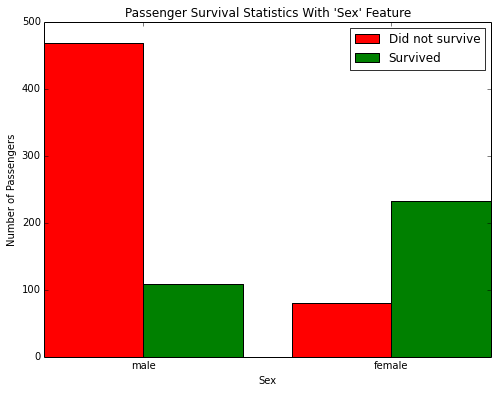

In [7]:
survival_stats(data, outcomes, 'Sex')

Examining the survival statistics, a large majority of males did not survive the ship sinking. However, a majority of females *did* survive the ship sinking. Let's build on our previous prediction: If a passenger was female, then we will predict that they survived. Otherwise, we will predict the passenger did not survive.  
Fill in the missing code below so that the function will make this prediction.  
**Hint:** You can access the values of each feature for a passenger like a dictionary. For example, `passenger['Sex']` is the sex of the passenger.

In [8]:
def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []

    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here

        if(passenger["Sex"]=='female'):
            predictions.append(1)
        else:
            predictions.append(0)

    #print len(data['Sex'])
    #print len(data[data["Sex"] == 'female']) #314
    #print len(data[data["Sex"] == 'male'])  #517
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_1(data)

### Question 2
*How accurate would a prediction be that all female passengers survived and the remaining passengers did not survive?*  
**Hint:** Run the code cell below to see the accuracy of this prediction.

In [9]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 78.68%.


**Answer**: Replace this text with the prediction accuracy you found above.

Using just the **Sex** feature for each passenger, we are able to increase the accuracy of our predictions by a significant margin. Now, let's consider using an additional feature to see if we can further improve our predictions. Consider, for example, all of the male passengers aboard the RMS Titanic: Can we find a subset of those passengers that had a higher rate of survival? Let's start by looking at the **Age** of each male, by again using the `survival_stats` function. This time, we'll use a fourth parameter to filter out the data so that only passengers with the **Sex** 'male' will be included.  
Run the code cell below to plot the survival outcomes of male passengers based on their age.

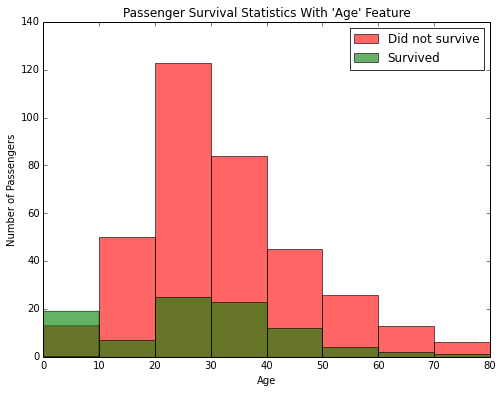

In [10]:
survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

Examining the survival statistics, the majority of males younger then 10 survived the ship sinking, whereas most males age 10 or older *did not survive* the ship sinking. Let's continue to build on our previous prediction: If a passenger was female, then we will predict they survive. If a passenger was male and younger than 10, then we will also predict they survive. Otherwise, we will predict they do not survive.  
Fill in the missing code below so that the function will make this prediction.  
**Hint:** You can start your implementation of this function using the prediction code you wrote earlier from `predictions_1`.

In [11]:
def predictions_2(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        if(passenger["Sex"]=='female'):
            predictions.append(1)
        elif (passenger["Sex"]=='male' and passenger["Age"]< 10 ):
            predictions.append(1)
        else:
            predictions.append(0)

    
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_2(data)

### Question 3
*How accurate would a prediction be that all female passengers and all male passengers younger than 10 survived?*  
**Hint:** Run the code cell below to see the accuracy of this prediction.

In [12]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 79.35%.


**Answer**: Replace this text with the prediction accuracy you found above.

Adding the feature **Age** as a condition in conjunction with **Sex** improves the accuracy by a small margin more than with simply using the feature **Sex** alone. Now it's your turn: Find a series of features and conditions to split the data on to obtain an outcome prediction accuracy of at least 80%. This may require multiple features and multiple levels of conditional statements to succeed. You can use the same feature multiple times with different conditions.   
**Pclass**, **Sex**, **Age**, **SibSp**, and **Parch** are some suggested features to try.

Use the `survival_stats` function below to to examine various survival statistics.  
**Hint:** To use mulitple filter conditions, put each condition in the list passed as the last argument. Example: `["Sex == 'male'", "Age < 18"]`

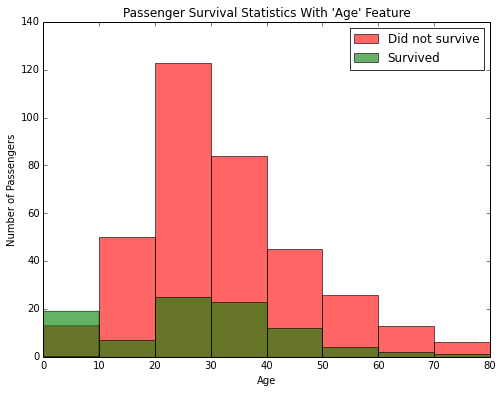

In [13]:
survival_stats(data, outcomes, 'Age', ["Sex == 'male'", "Age < 99"])

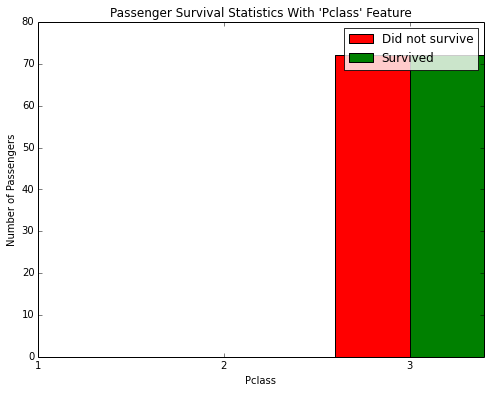

In [14]:
survival_stats(data, outcomes, 'Pclass',["Sex == 'female'", "Pclass == 3"])

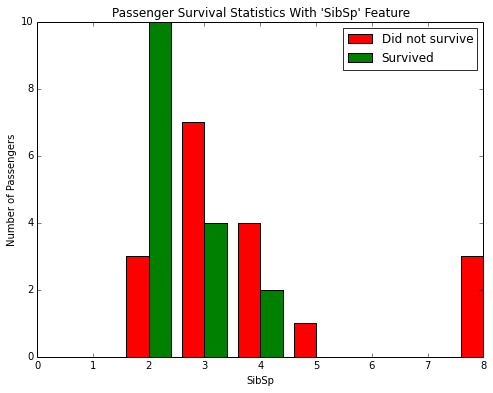

In [15]:
survival_stats(data, outcomes, 'SibSp',["Sex == 'female'", "SibSp > 1"])

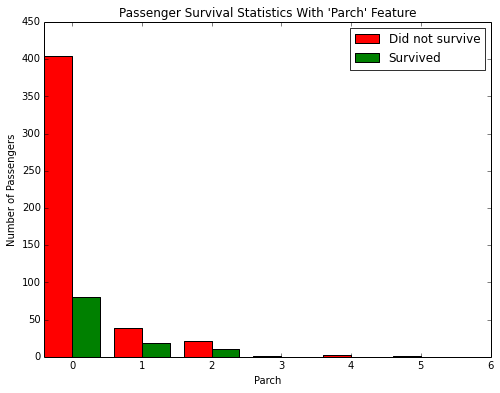

In [16]:
survival_stats(data, outcomes, 'Parch',["Sex == 'male'", "Parch < 9"])

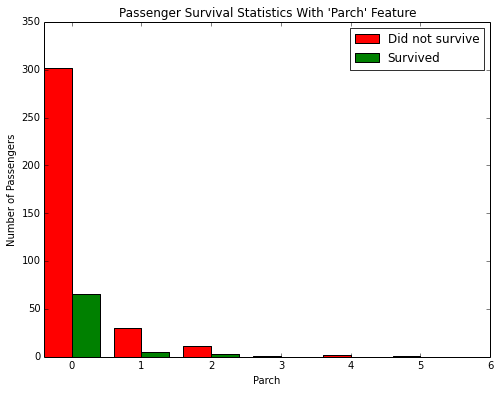

In [17]:
survival_stats(data, outcomes, 'Parch', ["Sex == 'male'", "Age >= 10"])

After exploring the survival statistics visualization, fill in the missing code below so that the function will make your prediction.  
Make sure to keep track of the various features and conditions you tried before arriving at your final prediction model.  
**Hint:** You can start your implementation of this function using the prediction code you wrote earlier from `predictions_2`.

In [18]:
def predictions_3(data):
    """ Model with multiple features. Makes a prediction with an accuracy of at least 80%. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        if(passenger["Sex"]=='female'):
                predictions.append(1)
        elif (passenger["Sex"]=='male' and passenger["Age"]<10):
            if (passenger["SibSp"] < 3 ):
                predictions.append(1)
            else:
                predictions.append(0)
        else:
            predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_3(data)

### Question 4
*Describe the steps you took to implement the final prediction model so that it got an accuracy of at least 80%. What features did you look at? Were certain features more informative than others? Which conditions did you use to split the survival outcomes in the data? How accurate are your predictions?*  
**Hint:** Run the code cell below to see the accuracy of your predictions.

In [19]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 80.70%.


In [20]:
# TEST DATA
test_df = pd.read_csv('test.csv', header=0)        # Load the test file into a dataframe

# Collect the test data's PassengerIds before dropping it
ids = test_df['PassengerId'].values

'''
# logistical model with features
predictions = predictions_3(test_df)
predictions_file = open("mylogisticmodel_Titanic_Survival_Exploration.csv", "wb")

open_file_object = csv.writer(predictions_file)
open_file_object.writerow(["PassengerId","Survived"])
open_file_object.writerows(zip(ids, predictions))
predictions_file.close()

'''




'\n# logistical model with features\npredictions = predictions_3(test_df)\npredictions_file = open("mylogisticmodel_Titanic_Survival_Exploration.csv", "wb")\n\nopen_file_object = csv.writer(predictions_file)\nopen_file_object.writerow(["PassengerId","Survived"])\nopen_file_object.writerows(zip(ids, predictions))\npredictions_file.close()\n\n'

In [35]:
# decision tree
from sklearn import tree 

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


# Convert the male and female groups to integer form
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1

# Impute the Embarked variable
#print(train["Embarked"])
train["Embarked"] = train["Embarked"].fillna("S")

# Convert the Embarked classes to integer form
train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

#Print the Sex and Embarked columns
print("-------Embarked-------")
print(train["Embarked"])
print("-------Sex-------")

print(train["Sex"])

# Create the target and features numpy arrays: target, features_one
print("------------Create the target and features numpy arrays: target, features_one------------")
target = train["Survived"].values
train["Age"] = train["Age"].fillna(train["Age"].median())
features_one = train[["Pclass", "Sex", "Age", "Fare"]].values

print ("-------features_one-------")
print ("Pclass", "Sex", "Age", "Fare")
print(features_one)

# Fit your first decision tree: my_tree_one
print("------------Fit your first decision tree: my_tree_one------------")
my_tree_one = tree.DecisionTreeClassifier()
my_tree_one = my_tree_one.fit(features_one, target)


# Look at the importance and score of the included features
print("------------Look at the importance and score of the included features------------")
print(my_tree_one.feature_importances_)
print(my_tree_one.score(features_one, target))

/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


-------Embarked-------
0      0
1      1
2      0
3      0
4      0
5      2
6      0
7      0
8      0
9      1
10     0
11     0
12     0
13     0
14     0
15     0
16     2
17     0
18     0
19     1
20     0
21     0
22     2
23     0
24     0
25     0
26     1
27     0
28     2
29     0
      ..
861    0
862    0
863    0
864    0
865    0
866    1
867    0
868    0
869    0
870    0
871    0
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    0
881    0
882    0
883    0
884    0
885    2
886    0
887    0
888    0
889    1
890    2
Name: Embarked, dtype: object
-------Sex-------
0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     1
15     1
16     0
17     0
18     1
19     1
20     0
21     0
22     1
23     0
24     1
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    1
864    0
865    1
866    1
867    0
868    0
869    0
870    0
871    1
87

/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [41]:
# Impute the missing value with the median
test.Fare[152] = test["Fare"].median()
print("-------------------test.Fare------------------------")
print(test["Fare"])

test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1

test["Age"] = test["Age"].fillna(test["Age"].median())
# Extract the features from the test set: Pclass, Sex, Age, and Fare.
test_features = test[["Pclass", "Sex", "Age", "Fare"]].values

# Make your prediction using the test set
my_prediction_one = my_tree_one.predict(test_features)

# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution_one = pd.DataFrame(my_prediction_one, PassengerId, columns = ["Survived"])
print("--------------------my_solution_one------------------------")
print(my_solution_one)

# Check that your data frame has 418 entries
print("--------------------my_solution_one.shape------------------------")
print(my_solution_one.shape)

# Write your solution to a csv file with the name my_solution.csv
my_solution_one.to_csv("my_solution_one_decisiontree.csv", index_label = ["PassengerId"])

/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


-------------------test.Fare------------------------
0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
5        9.2250
6        7.6292
7       29.0000
8        7.2292
9       24.1500
10       7.8958
11      26.0000
12      82.2667
13      26.0000
14      61.1750
15      27.7208
16      12.3500
17       7.2250
18       7.9250
19       7.2250
20      59.4000
21       3.1708
22      31.6833
23      61.3792
24     262.3750
25      14.5000
26      61.9792
27       7.2250
28      30.5000
29      21.6792
         ...   
388      7.7500
389     21.0750
390     93.5000
391     39.4000
392     20.2500
393     10.5000
394     22.0250
395     60.0000
396      7.2500
397     79.2000
398      7.7750
399      7.7333
400    164.8667
401     21.0000
402     59.4000
403     47.1000
404     27.7208
405     13.8625
406     10.5000
407    211.5000
408      7.7208
409     13.7750
410      7.7500
411     90.0000
412      7.7750
413      8.0500
414    108.9000
415      7.2500
416

**Answer**: Replace this text with your answer to the question above.

In [43]:
# Create a new array with the added features: features_two
features_two = train[["Pclass","Age","Sex","Fare", "SibSp", "Parch", "Embarked"]].values
#print("----------------features_two----------------------")
#print(features_two)
#Control overfitting by setting "max_depth" to 10 and "min_samples_split" to 5 : my_tree_two

max_depth = 10
min_samples_split = 5
my_tree_two = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 5, random_state = 1)

target = train["Survived"].values

#fit(X, y[, sample_weight, check_input, ...])	Build a decision tree classifier from the training set (X, y).
print("target shape = ", target.shape)
print("features_two shape = ", features_two.shape)
my_tree_two = my_tree_two.fit(features_two, target)


#Print the score of the new decison tree

print("------------Look at the importance and score of the included features------------")
print(my_tree_two.feature_importances_)
print(my_tree_two.score(features_two, target))


# Create train_two with the newly defined feature
train_two = train.copy()
train_two["family_size"] = train_two["SibSp"] + train_two["Parch"] + 1

# Create a new feature set and add the new feature
features_three = train_two[["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", "family_size"]].values

# Define the tree classifier, then fit the model
my_tree_three = tree.DecisionTreeClassifier()
my_tree_three = my_tree_three.fit(features_three, target)

# Print the score of this decision tree
print(my_tree_three.score(features_three, target))

test_two = test.copy()
test_two["family_size"] = test_two["SibSp"] + test_two["Parch"] + 1
test_features_two = test_two[["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", "family_size"]].values


# Make your prediction using the test set
my_prediction_three = my_tree_three.predict(test_features_two)




# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution_two = pd.DataFrame(my_prediction_three, PassengerId, columns = ["Survived"])

print("--------------------my_solution_two------------------------")
print(my_solution_two)

# Check that your data frame has 418 entries
print("--------------------my_solution_two.shape------------------------")
print(my_solution_two.shape)

# Write your solution to a csv file with the name my_solution.csv
my_solution_two.to_csv("my_solution_two_not_overfitting_decisiontree.csv", index_label = ["PassengerId"])

('target shape = ', (891,))
('features_two shape = ', (891, 7))
------------Look at the importance and score of the included features------------
[ 0.14130255  0.17906027  0.41616727  0.17938711  0.05039699  0.01923751
  0.0144483 ]
0.905723905724
0.979797979798
--------------------my_solution_two------------------------
      Survived
892          0
893          0
894          1
895          1
896          1
897          0
898          0
899          0
900          1
901          0
902          0
903          0
904          1
905          1
906          1
907          1
908          0
909          1
910          1
911          0
912          0
913          1
914          1
915          0
916          1
917          0
918          1
919          1
920          1
921          1
...        ...
1280         0
1281         0
1282         1
1283         1
1284         1
1285         0
1286         1
1287         1
1288         0
1289         1
1290         0
1291         0
1292         1
12

In [45]:
# Import the `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier

# Impute the Embarked variable


test_two["Embarked"] = test_two["Embarked"].fillna("S")

# Convert the Embarked classes to integer form
test_two["Embarked"][test_two["Embarked"] == "S"] = 0
test_two["Embarked"][test_two["Embarked"] == "C"] = 1
test_two["Embarked"][test_two["Embarked"] == "Q"] = 2


# We want the Pclass, Age, Sex, Fare,SibSp, Parch, and Embarked variables
features_forest = train[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values

# Building and fitting my_forest
forest = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 1)
my_forest = forest.fit(features_forest, target)

# Print the score of the fitted random forest
print(my_forest.score(features_forest, target))

# Compute predictions on our test set features then print the length of the prediction vector
test_features_three = test_two[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
pred_forest = my_forest.predict(test_features_three)
print(len(pred_forest))

/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.939393939394
418


In [47]:
#Request and print the `.feature_importances_` attribute
print(my_tree_two.feature_importances_)
print(my_tree_three.feature_importances_)
print(my_forest .feature_importances_)

#Compute and print the mean accuracy score for both models
print(my_tree_two.score(features_two, target))
print(my_tree_three.score(features_three, target))
print(my_forest .score(features_two, target))

[ 0.14130255  0.17906027  0.41616727  0.17938711  0.05039699  0.01923751
  0.0144483 ]
[ 0.10931463  0.31088095  0.22039703  0.27655287  0.01485436  0.02349759
  0.04450258]
[ 0.10384741  0.20139027  0.31989322  0.24602858  0.05272693  0.04159232
  0.03452128]
0.905723905724
0.979797979798
0.939393939394


In [48]:
# Make your prediction using the test set

# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution_forest = pd.DataFrame(pred_forest, PassengerId, columns = ["Survived"])

print("--------------------my_solution_forest------------------------")
print(my_solution_forest)

# Check that your data frame has 418 entries
print("--------------------my_solution_forest.shape------------------------")
print(my_solution_forest.shape)

# Write your solution to a csv file with the name my_solution.csv
my_solution_forest.to_csv("my_solution_forest.csv", index_label = ["PassengerId"])

--------------------my_solution_forest------------------------
      Survived
892          0
893          0
894          0
895          0
896          0
897          0
898          0
899          0
900          1
901          0
902          0
903          0
904          1
905          0
906          1
907          1
908          0
909          0
910          0
911          0
912          1
913          0
914          1
915          1
916          1
917          0
918          1
919          0
920          0
921          0
...        ...
1280         0
1281         0
1282         0
1283         1
1284         0
1285         0
1286         0
1287         1
1288         0
1289         1
1290         0
1291         0
1292         1
1293         0
1294         1
1295         0
1296         0
1297         0
1298         0
1299         0
1300         1
1301         1
1302         1
1303         1
1304         0
1305         0
1306         1
1307         0
1308         0
1309         1

[418 r

# Conclusion

Congratulations on what you've accomplished here! You should now have an algorithm for predicting whether or not a person survived the Titanic disaster, based on their features. In fact, what you have done here is a manual implementation of a simple machine learning model, the _decision tree_. In a decision tree, we split the data into smaller groups, one feature at a time. Each of these splits will result in groups that are more homogeneous than the original group, so that our predictions become more accurate. The advantage of having a computer do things for us is that it will be more exhaustive and more precise than our manual exploration above. [This link](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/) provides another introduction into machine learning using a decision tree.

A decision tree is just one of many algorithms that fall into the category of _supervised learning_. In this Nanodegree, you'll learn about supervised learning techniques first. In supervised learning, we concern ourselves with using features of data to predict or model things with objective outcome labels. That is, each of our datapoints has a true outcome value, whether that be a category label like survival in the Titanic dataset, or a continuous value like predicting the price of a house.

### Question 5
*Can you think of an example of where supervised learning can be applied?*  
**Hint:** Be sure to note the outcome variable to be predicted and at least two features that might be useful for making the predictions.

**Answer**: Replace this text with your answer to the question above.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.